# Emotion detection 

The goal is to develop a fully functional real-time emotion detector that can be used. It should allow to detect from live video footage to check wether a person is sad, happy or angry. 

A working application will have to following pipeline:

1. Video capturing, for example from a webcam.
2. Face detection to find the location of all the faces in the image
3. Image preprocessing, like face cropping
4. Emotion detection with a Convolutional Neural Network
5. Visualization of the detections


First you will focus on the emotion detector and the data necessary to train it. 
We have provided for you a set of images with people displaying the emotions that need to be detected>
It's an option to make use of image augmentation while training the CNN. Take into account that the faces will have to be cropped from the background.
Because we to deal with partially occluded faces, regular face detectors will often fail. The MTCNN library or the OpenCV DNN module will usully perform better in these extreme situations.


Once you have trained your neural network, test it carefully and perform hyperparameter tuning to improve the performance.  

Once you have the CNN trained you can build the entire pipeline.
Use OpenCV to capture a video stream from your webcam. In case you don't have a webcam, find a video online of people showing the emotions. There should be plenty of them.
More information on how you can use OpenCV to access your webcam: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html



In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for preventing overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of the data will be used for validation
)

# Load and preprocess the training data
home_path = '/mnt/c/Users/lucas/Documents/smhek/year3/deepLearing/week2/'

# Train generator from /emotion detection/happy, /emotion detection/sad, and /emotion detection/angry
train_generator = train_datagen.flow_from_directory(
    home_path + 'emotion detection/',
    target_size=(64, 64),
    batch_size=258,
    class_mode='categorical',
    classes=['angry', 'happy', 'sad'],
    subset='training'  # Specify that this is the training set
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    home_path + 'emotion detection/',
    target_size=(64, 64),
    batch_size=258,
    class_mode='categorical',
    classes=['angry', 'happy', 'sad'],
    subset='validation'  # Specify that this is the validation set
)

# Note: No separate test generator is needed, as you'll be using the validation set for evaluating your model.


Found 11229 images belonging to 3 classes.
Found 4811 images belonging to 3 classes.


## Example images

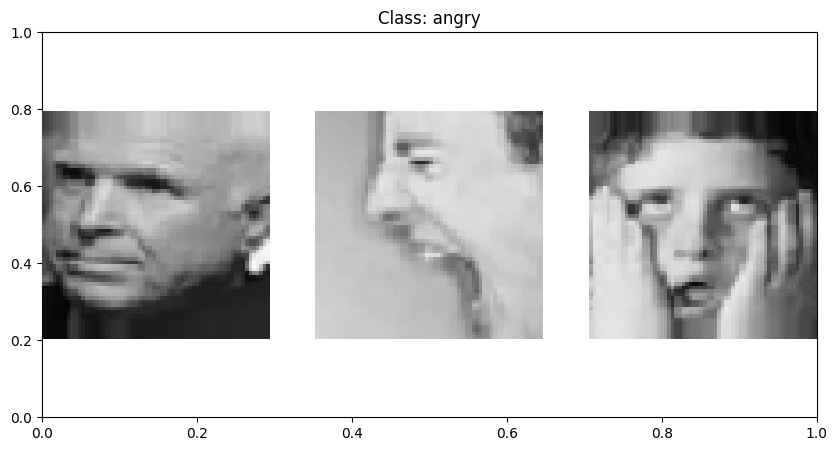

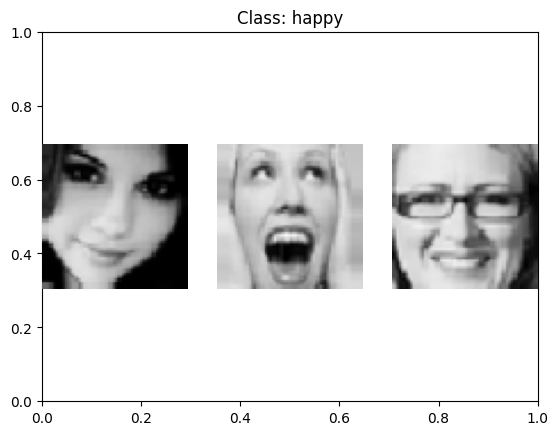

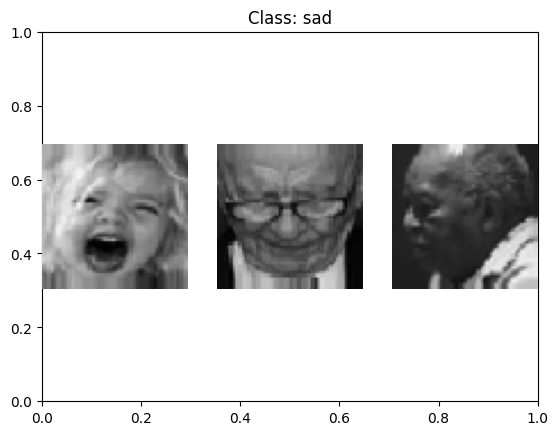

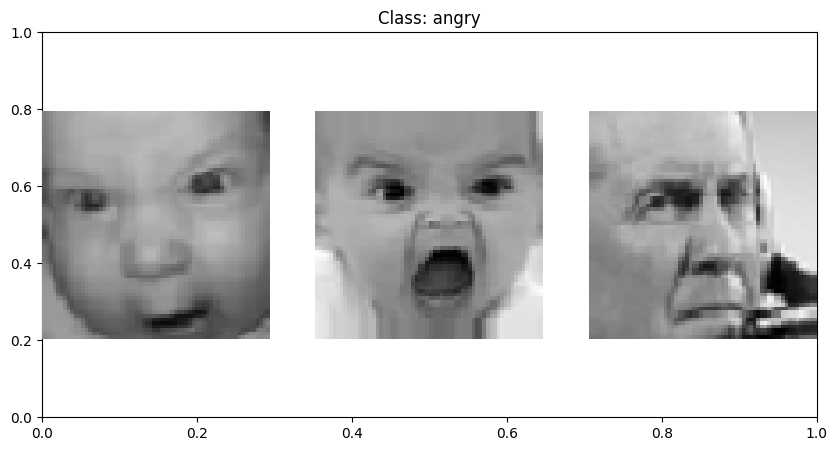

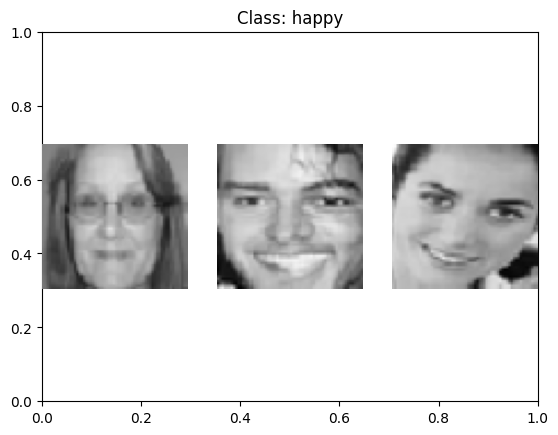

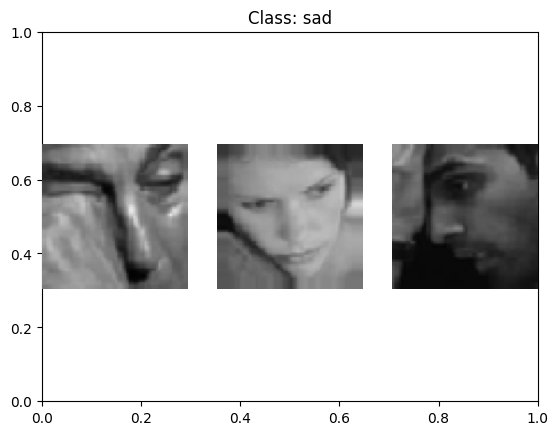

In [4]:
import matplotlib.pyplot as plt

# Function to plot images from a generator
def plot_images(generator, class_labels, num_images=3):
    plt.figure(figsize=(10, 5))
    
    for class_label in class_labels:
        plt.title(f"Class: {class_label}")
        
        # Find the index corresponding to the class label
        class_index = generator.class_indices[class_label]
        
        # Retrieve one batch of images and labels
        images, labels = generator.next()
        
        # Use boolean indexing to filter images for the specified class
        class_images = images[labels[:, class_index] == 1][:num_images]
        
        # Plot the images
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(class_images[i])
            plt.axis('off')

        plt.show()

# Plot images from the training generator
plot_images(train_generator, class_labels=['angry', 'happy', 'sad'])

# Plot images from the validation generator
plot_images(validation_generator, class_labels=['angry', 'happy', 'sad'])


## Model config

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam

# Define your model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3)))  # Adjust input_shape to match your image size and number of channels
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(3))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Train the model using generators
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the model
model.save(home_path+'/emotiondetect_models/emotion_detection_v2.h5')


2023-11-30 16:34:56.834425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 16:34:56.834490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 16:34:56.834506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 16:34:58.218049: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 16:34:58.218117: I tensorflow/compile

Epoch 1/15


2023-11-30 16:35:00.111211: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-11-30 16:35:02.872460: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-30 16:35:03.063683: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2023-11-30 16:35:03.063726: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at ptxas
2023-11-30 16:35:03.063844: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-30 16:35:03.

43/43 [==============================] - 76s 2s/step - loss: 1.1025 - accuracy: 0.4628 - val_loss: 1.0698 - val_accuracy: 0.4488
Epoch 2/15
43/43 [==============================] - 75s 2s/step - loss: 0.9192 - accuracy: 0.5575 - val_loss: 1.1040 - val_accuracy: 0.4404
Epoch 3/15
43/43 [==============================] - 92s 2s/step - loss: 0.8381 - accuracy: 0.6049 - val_loss: 1.0916 - val_accuracy: 0.3936
Epoch 4/15
43/43 [==============================] - 75s 2s/step - loss: 0.7710 - accuracy: 0.6499 - val_loss: 1.2060 - val_accuracy: 0.4526
Epoch 5/15
43/43 [==============================] - 74s 2s/step - loss: 0.7076 - accuracy: 0.6801 - val_loss: 1.0477 - val_accuracy: 0.4468
Epoch 6/15
43/43 [==============================] - 93s 2s/step - loss: 0.6649 - accuracy: 0.7093 - val_loss: 0.9815 - val_accuracy: 0.5144
Epoch 7/15
43/43 [==============================] - 74s 2s/step - loss: 0.6297 - accuracy: 0.7226 - val_loss: 0.9850 - val_accuracy: 0.5241
Epoch 8/15
43/43 [=============

/home/lucaswsl/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
Y_pred = model.predict(validation_generator)
print(Y_pred)
#if the prediction is > 0.5 then the output is 1 else the output is 0
y_pred = np.argmax(Y_pred, axis=1)
 
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['angry', 'happy', 'sad']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
print('Accuracy Score')
print(accuracy_score(validation_generator.classes, y_pred))


19/19 [==============================] - 14s 720ms/step
[[0.01016077 0.96808404 0.02175514]
 [0.05606543 0.03584674 0.9080878 ]
 [0.03551649 0.03504556 0.929438  ]
 ...
 [0.43859664 0.00240388 0.5589995 ]
 [0.15268731 0.49905136 0.34826133]
 [0.10375693 0.5720549  0.32418814]]
Confusion Matrix
[[ 184  415  599]
 [ 297  778 1089]
 [ 230  530  689]]
Classification Report
              precision    recall  f1-score   support

       angry       0.26      0.15      0.19      1198
       happy       0.45      0.36      0.40      2164
         sad       0.29      0.48      0.36      1449

    accuracy                           0.34      4811
   macro avg       0.33      0.33      0.32      4811
weighted avg       0.35      0.34      0.34      4811

Accuracy Score
0.34317189773435874


## Code to test out the detection via webcam

In [ ]:
import cv2
import numpy as np
from tensorflow import keras

# Load the trained emotion detection model
model = keras.models.load_model('./emotiondetect_models/emotion_detection_v2.h5')  # Replace with your model file

#print all available webcams
for i in range(10):
    cap = cv2.VideoCapture(i)

# Initialize the webcam or video source
cap = cv2.VideoCapture(0)  # Try changing this index if the default camera is not at index 0


# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Load the Haar Cascade classifier for face detection (you can replace this with MTCNN or other methods)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Define a function to preprocess the detected face for the new model
def preprocess_face(face):
    # Preprocess the face as needed, e.g., resize and normalize
    face = cv2.resize(face, (64, 64))  # Resize to match the model input size
    face = face / 255.0  # Normalize to [0, 1]
    return face

while True:
    ret, frame = cap.read()

    # Check if the frame is empty
    if not ret:
        print("Error: Could not read frame.")
        break
    
    # Perform face detection and emotion prediction for each frame
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert frame to grayscale
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        # Extract the detected face
        detected_face = frame[y:y + h, x:x + w]
        
        # Preprocess the detected face and pass it to the emotion detection model
        face = preprocess_face(detected_face)
        face = np.expand_dims(face, axis=0)  # Add a batch dimension
        emotion_probs = model.predict(face)
        
        # Get the predicted emotion class
        predicted_emotion = ['angry', 'happy', 'sad'][np.argmax(emotion_probs)]
        
        # Draw a rectangle around the detected face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Draw the emotion prediction on the frame
        cv2.putText(frame, f"Emotion: {predicted_emotion}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display the frame with emotion prediction
    cv2.imshow('Emotion Detector', frame)
    
    if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' key to exit
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()